In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Cargamos los 3 parches que vamos a utilizar

In [58]:
p1=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/EDA/EDA-LOL/S12/League of Legends Champion Stats 12.1.csv",sep=";")

p13=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/EDA/EDA-LOL/S12/League of Legends Champion Stats 12.13.csv",sep=";")

p23=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/EDA/EDA-LOL/S12/League of Legends Champion Stats 12.23.csv",sep=";")



### Mostramos a continuación las cabeceras de los parches para ver que funcionan correctamente y que sus casi todas sus stats son distintas

In [59]:
p1.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93%,93.47%,4.62%,1.04%,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59%,65.65%,8.16%,12.88%,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,48.57%,34.06%,4.24%,12.88%,2.04
4,Akshan,Marksman,MID,S,59.85,0.65,51.46%,58.01%,4.83%,21.91%,2.23


In [60]:
p13.head()


,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,69.09,0.40,49.54%,92.37%,7.47%,5.81%,1.95
1,Ahri,Mage,MID,God,71.47,-1.62,51.08%,94.53%,8.58%,5.88%,2.66
2,Akali,Assassin,MID,S,66.02,5.61,48.20%,69.28%,8.45%,12.11%,2.37
3,Akali,Assassin,TOP,B,46.97,5.99,47.26%,29.94%,3.44%,12.11%,2.05
4,Akshan,Marksman,MID,B,43.54,-5.53,48.29%,58.06%,2.72%,6.43%,2.17


In [61]:
p23.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,89.50,0.31,50.10%,90.37%,9.85%,20.80%,1.90
1,Ahri,Mage,MID,A,52.62,-2.26,49.64%,91.71%,5.37%,2.28%,2.40
2,Akali,Assassin,MID,S,61.16,-4.15,48.46%,75.48%,9.39%,15.86%,2.30
3,Akali,Assassin,TOP,B,41.14,-1.83,45.46%,23.39%,2.95%,15.86%,1.98
4,Akshan,Marksman,MID,A,49.05,-0.97,51.55%,64.06%,2.49%,3.87%,2.18


### Mostramos las dimensiones de cada uno para ver la variación producida


In [6]:
print(p1.shape, "\n")
print(p13.shape, "\n")
print(p23.shape, "\n")

(232, 11) 

(240, 11) 

(252, 11) 



Como podemos observar, se han añadido filas a los parches, ya que se tratan de personajes nuevos, así como roles que se han ido incluyendo a personajes.

## Vamos a convertir aquellas columnas que tienen porcentajes en numérico

In [63]:
# Quitamos el símbolo de % 

for col in ["Win %", "Role %", "Pick %", "Ban %"]:
    p1[col] = p1[col].str[:-1]
    p13[col] = p13[col].str[:-1]
    p23[col] = p23[col].str[:-1]

p13

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,69.09,0.40,49.5,92.3,7.4,5.8,1.95
1,Ahri,Mage,MID,God,71.47,-1.62,51.0,94.5,8.5,5.8,2.66
2,Akali,Assassin,MID,S,66.02,5.61,48.2,69.2,8.4,12.1,2.37
3,Akali,Assassin,TOP,B,46.97,5.99,47.2,29.9,3.4,12.1,2.05
4,Akshan,Marksman,MID,B,43.54,-5.53,48.2,58.0,2.7,6.4,2.17
...,...,...,...,...,...,...,...,...,...,...,...
235,Ziggs,Mage,ADC,D,35.17,2.13,49.9,49.8,1.0,0.2,2.44
236,Zilean,Support,MID,A,53.68,0.57,53.2,18.1,0.8,2.1,3.47
237,Zilean,Support,SUPPORT,A,48.10,3.96,49.7,78.1,3.4,2.1,3.14
238,Zoe,Mage,MID,B,46.72,-0.80,47.9,91.3,3.6,1.6,2.44


In [64]:
p13.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %      object
Role %     object
Pick %     object
Ban %      object
KDA       float64
dtype: object

In [65]:
# Convertimos a float

cols = ["Win %", "Role %", "Pick %", "Ban %"]
p1[cols] = p1[cols].apply(pd.to_numeric)
p13[cols] = p13[cols].apply(pd.to_numeric)
p23[cols] = p23[cols].apply(pd.to_numeric)

In [66]:
p13.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %     float64
Role %    float64
Pick %    float64
Ban %     float64
KDA       float64
dtype: object

## A continuación mostraremos los valores que se encuentran en las columnas Class, Role y Tier.
Estas no van sufrir variación, excepto que se añada un nuevo rol a un personaje y que la columna " Tier " vaya cambiando de letra en función del potencial que tenga un personaje en dicho parche


#### Tras esto, con gráficos veremos cuales son las clases y roles que más aparecen en el parche 1. 

In [19]:
Class=p1.Class.unique().tolist()
Class.pop()    # Al tomar una clase como nula, hemos eliminado dicho valor.
print(f"Las clases de personajes que encontramos son: {Class}", "\n")

Role=p1.Role.unique().tolist()
print(f"Los roles de personajes que encontramos son: {Role}", "\n")

Tier=p1.Tier.unique().tolist()
print(f"Las etiquetas que se ponen a los personajes dependiendo de su potencial en ese parche son: {Tier}")




Las clases de personajes que encontramos son: ['Fighter', 'Mage', 'Assassin', 'Marksman', 'Tank', 'Support'] 

Los roles de personajes que encontramos son: ['TOP', 'MID', 'SUPPORT', 'JUNGLE', 'ADC'] 

Las etiquetas que se ponen a los personajes dependiendo de su potencial en ese parche son: ['A', 'S', 'B', 'C', 'D', 'God']


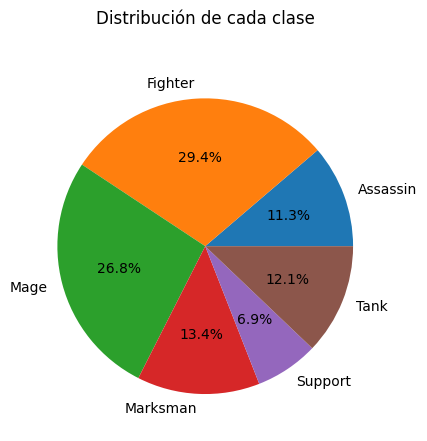

In [72]:
# Porcentajes de cada clase

tamaño_Class = p1.groupby("Class").size()
labels = tamaño_Class.index.tolist()

fig, ax = plt.subplots()
ax.pie(tamaño_Class, labels=labels, autopct='%1.1f%%')
ax.set_title("Distribución de cada clase", y=1.08)

plt.show()

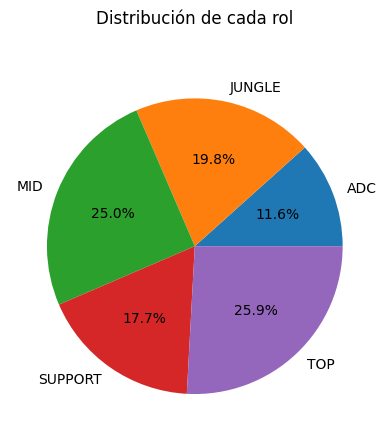

In [74]:
# Ahora mostraremos los roles

tamaño_Role = p1.groupby("Role").size()
labels = tamaño_Role.index.tolist()

fig, ax = plt.subplots()
ax.pie(tamaño_Role, labels=labels, autopct='%1.1f%%')
ax.set_title("Distribución de cada rol", y=1.08)

plt.show()


### En función de lo anterior, vamos a hacer la primera demostración de como van produciéndose cambios durante una season en League of Legends

In [85]:
# Vemos aquellos personajes que cumplen con ambas condiciones


fighter_top= p1[(p1["Class"] == "Fighter") & (p1["Role"] == "TOP")]
fighter_top


,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.9,94.6,4.4,2.0,1.97
22,Camille,Fighter,TOP,God,84.61,9.60,50.2,96.8,7.1,7.5,1.99
28,Darius,Fighter,TOP,God,83.96,16.49,50.3,95.8,6.5,15.1,1.87
39,Fiora,Fighter,TOP,S,75.08,4.32,50.0,97.6,6.0,10.7,1.76
43,Gangplank,Fighter,TOP,S,65.59,14.31,47.6,87.3,5.9,4.4,1.99
45,Garen,Fighter,TOP,S,73.99,15.67,51.5,87.4,5.7,2.1,2.10
46,Gnar,Fighter,TOP,A,47.10,4.58,49.8,97.8,3.0,0.6,2.01
47,Gragas,Fighter,TOP,C,37.47,-2.35,48.7,39.6,1.9,0.3,2.24
52,Gwen,Fighter,TOP,A,54.66,13.03,49.8,82.8,4.2,2.4,1.73
59,Illaoi,Fighter,TOP,C,34.11,-3.45,49.1,92.3,2.0,2.5,1.49


## Una vez conseguido esta tabla, vamos a mostrar el por qué hay personajes con menos de un 60 % de ROLE %

In [104]:
# Filtramos con una mascara de booleanos para sacar los valores menores a 60

fighter_top_menos60=fighter_top.loc[fighter_top["Role %"] <= 60]
fighter_top_menos60

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
47,Gragas,Fighter,TOP,C,37.47,-2.35,48.7,39.6,1.9,0.3,2.24
60,Irelia,Fighter,TOP,God,81.35,-5.02,49.1,60.0,6.2,23.5,1.58
118,Olaf,Fighter,TOP,D,11.03,-6.16,45.4,15.6,0.2,0.9,1.63
123,Pantheon,Fighter,TOP,D,30.79,-10.85,49.6,26.7,0.9,0.8,2.10
141,Rumble,Fighter,TOP,D,25.32,-2.02,47.5,46.6,1.0,0.2,2.02
157,Shyvana,Fighter,TOP,D,23.83,-11.61,49.8,12.5,0.2,0.2,1.88
162,Skarner,Fighter,TOP,D,23.89,-6.83,48.9,22.2,0.1,0.1,2.22
183,Trundle,Fighter,TOP,B,44.04,3.38,52.7,31.1,1.8,2.6,1.83
207,Volibear,Fighter,TOP,D,32.21,-8.58,46.1,56.0,2.5,1.4,1.79
209,Warwick,Fighter,TOP,D,31.35,-7.37,49.3,24.8,1.2,5.6,1.94


In [118]:
# Aplicamos a la columna name, aquellos valores de la máscara de booleanos de la misma columna

masc_ftm60=p1.loc[p1["Name"].isin(["Gragas","Irelia","Olaf","Pantheon",
                                   "Rumble","Shyvana","Skarner",
                                   "Trundle","Volibear"
                                   "Warwick","Yasuo"])]
masc_ftm60

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
47,Gragas,Fighter,TOP,C,37.47,-2.35,48.7,39.6,1.9,0.3,2.24
48,Gragas,Fighter,JUNGLE,C,36.10,-7.55,48.0,40.6,1.6,0.3,2.70
49,Gragas,Fighter,SUPPORT,D,32.15,-2.55,47.6,11.5,0.4,0.3,2.25
60,Irelia,Fighter,TOP,God,81.35,-5.02,49.1,60.0,6.2,23.5,1.58
61,Irelia,Fighter,MID,A,48.07,-1.08,48.2,39.1,4.1,23.5,1.75
117,Olaf,Fighter,JUNGLE,C,36.61,5.55,49.0,84.7,1.4,0.8,2.45
118,Olaf,Fighter,TOP,D,11.03,-6.16,45.4,15.6,0.2,0.9,1.63
121,Pantheon,Fighter,MID,B,41.54,-2.49,50.8,27.3,1.1,0.8,2.25
122,Pantheon,Fighter,SUPPORT,D,32.78,-2.48,47.0,39.7,1.7,0.8,1.89
123,Pantheon,Fighter,TOP,D,30.79,-10.85,49.6,26.7,0.9,0.8,2.10


In [156]:
masc_ftm60_rz=masc_ftm60.iloc[:,[0,2,3,7]]
masc_ftm60_rz

,Name,Role,Tier,Role %
47,Gragas,TOP,C,39.6
48,Gragas,JUNGLE,C,40.6
49,Gragas,SUPPORT,D,11.5
60,Irelia,TOP,God,60.0
61,Irelia,MID,A,39.1
117,Olaf,JUNGLE,C,84.7
118,Olaf,TOP,D,15.6
121,Pantheon,MID,B,27.3
122,Pantheon,SUPPORT,D,39.7
123,Pantheon,TOP,D,26.7


In [157]:
# Sacamos manualmente aquellos valores que nos interesan para la muestra.

muestra1=masc_ftm60_rz.loc[masc_ftm60_rz["Name"].isin(["Irelia","Olaf",
                                               "Shyvana","Skaner","Trundle"])]
muestra1

,Name,Role,Tier,Role %
60,Irelia,TOP,God,60.0
61,Irelia,MID,A,39.1
117,Olaf,JUNGLE,C,84.7
118,Olaf,TOP,D,15.6
156,Shyvana,JUNGLE,C,82.5
157,Shyvana,TOP,D,12.5
182,Trundle,JUNGLE,A,62.9
183,Trundle,TOP,B,31.1


### Podemos observar en la tabla que según los filtros aplicados, aquellos que tenían menos de un 60 % en la columna "Role %", es porque tienen más roles.
### Esto quiere decir que son personajes que se utilizan en varias posiciones y por ello no son específicos para una sola, pero sí que se puede apreciar 2 cosas a simple vista, y es que aquellos que solo tienen 2 posiciones, tienen un rol más predominante y el de menor % es el que en algún momento desde los comienzos del juego, se empezó a jugar en otra posición pero no es la mejor opción a jugar en este parche


## Por ello vamos a comparar estos personajes cuyos datos pertenecen al parche 1, con los del parche 13 y 23, para ver si varían realmente.

In [158]:
# Parche 1

muestra1

,Name,Role,Tier,Role %
60,Irelia,TOP,God,60.0
61,Irelia,MID,A,39.1
117,Olaf,JUNGLE,C,84.7
118,Olaf,TOP,D,15.6
156,Shyvana,JUNGLE,C,82.5
157,Shyvana,TOP,D,12.5
182,Trundle,JUNGLE,A,62.9
183,Trundle,TOP,B,31.1


In [159]:
# Parche 13

muestra2=p13.loc[p13["Name"].isin(["Irelia","Olaf",
                                    "Shyvana","Skaner","Trundle"])]
muestra2=muestra2.iloc[:,[0,2,3,7]]
muestra2


,Name,Role,Tier,Role %
61,Irelia,TOP,S,54.2
62,Irelia,MID,A,44.1
122,Olaf,TOP,A,72.0
123,Olaf,JUNGLE,D,24.1
161,Shyvana,JUNGLE,A,58.1
162,Shyvana,TOP,A,39.8
190,Trundle,JUNGLE,A,71.6
191,Trundle,TOP,B,24.2


In [160]:
# Parche 23

muestra3=p23.loc[p23["Name"].isin(["Irelia","Olaf",
                                    "Shyvana","Skaner","Trundle"])]
muestra3=muestra3.iloc[:,[0,2,3,7]]
muestra3

,Name,Role,Tier,Role %
65,Irelia,TOP,S,45.6
66,Irelia,MID,A,52.1
129,Olaf,TOP,A,72.9
130,Olaf,JUNGLE,D,22.7
171,Shyvana,JUNGLE,C,81.0
172,Shyvana,TOP,D,11.8
198,Trundle,JUNGLE,C,70.8
199,Trundle,TOP,D,21.9


### Una vez tenemos las 3 muestras vamos a selecionar de cada parche, aquellas filas cuyo Role % sea > 50 y realizaremos un gráfico para ver su variación

In [208]:
# Aplicamos máscara para seleccionar solo aquellos que deseamos mostrar

var1=muestra1.loc[muestra1["Role %"] > 50]
var2=muestra2.loc[muestra2["Role %"] > 50]
var3=muestra3.loc[muestra3["Role %"] > 50]
var1

,Name,Role,Tier,Role %
60,Irelia,TOP,God,60.0
117,Olaf,JUNGLE,C,84.7
156,Shyvana,JUNGLE,C,82.5
182,Trundle,JUNGLE,A,62.9


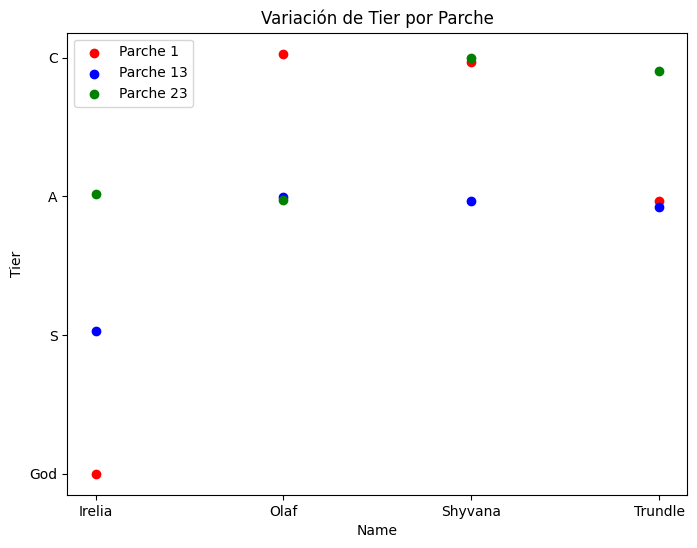

In [204]:
# Procedemos a meter los datos manualmente para hacer el gráfico de la Tier y ver como varían

names = ["Irelia", "Olaf", "Shyvana", "Trundle"]
tiers1 = pd.Categorical(["God", "C", "C", "A"], categories=["God", "S", "A", "C"])
tiers2 = pd.Categorical(["S", "A", "A", "A"], categories=["God", "S", "A", "C"])
tiers3 = pd.Categorical(["A", "A", "C", "C"], categories=["God", "S", "A", "C"])

# Crear una figura y un eje
fig, ax = plt.subplots()

# Establecer el tamaño de la figura
fig.set_size_inches(8, 6)

# Configurar la trama de dispersión para cada variable
ax.scatter(np.arange(len(names)), tiers1.codes + np.random.uniform(-0.1, 0.1, len(names)), c='red', label='Parche 1')
ax.scatter(np.arange(len(names)), tiers2.codes + np.random.uniform(-0.1, 0.1, len(names)), c='blue', label='Parche 13')
ax.scatter(np.arange(len(names)), tiers3.codes + np.random.uniform(-0.1, 0.1, len(names)), c='green', label='Parche 23')

# Añadir etiquetas a los ejes y un título
ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names)
ax.set_xlabel('Name')
ax.set_ylabel('Tier')
ax.set_title('Variación de Tier por Parche')

# Establecer las etiquetas del eje Y
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["God", "S", "A", "C"])

# Añadir una leyenda
ax.legend()

# Mostrar la trama
plt.show()


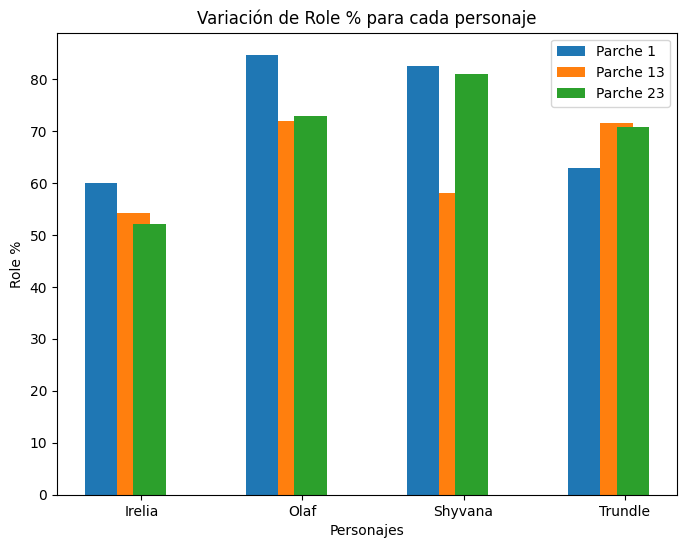

In [217]:
# En este mostramos la variación del Role %

names = ["Irelia", "Olaf", "Shyvana", "Trundle"]

role_percentages_var1 = [60.0, 84.7, 82.5, 62.9]
role_percentages_var2 = [54.2, 72.0, 58.1, 71.6]
role_percentages_var3 = [52.1, 72.9, 81.0, 70.8]

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

fig.set_size_inches(8, 6)

# Definir la anchura de las barras y la separación entre ellas
bar_width = 0.2
bar_gap = 0.05

# Agregar barras para cada variable, con los valores de "Role %" y el ancho de cada barra
ax.bar([i - bar_gap - bar_width for i in range(len(names))], role_percentages_var1, width=bar_width, label="Parche 1")
ax.bar([i - bar_gap for i in range(len(names))], role_percentages_var2, width=bar_width, label="Parche 13")
ax.bar([i + bar_gap for i in range(len(names))], role_percentages_var3, width=bar_width, label="Parche 23")

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)

# Agregar etiquetas para los ejes X e Y, y un título
ax.set_xlabel("Personajes")
ax.set_ylabel("Role %")
ax.set_title("Variación de Role % para cada personaje")

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

# A continuación vamos a mostrar el Top 5 de personajes de la posición MID, para ver si han variado desde el parche 1 al parche 23.

In [238]:
# Filtramos con máscara para saber aquellos personajes cuyo rol es MID en ambos parches

p1_mid=p1.loc[p1["Role"]== "MID"]
p13_mid=p13.loc[p13["Role"]== "MID"]
p23_mid=p23.loc[p23["Role"] == "MID"]
p23_mid

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
1,Ahri,Mage,MID,A,52.62,-2.26,49.6,91.7,5.3,2.2,2.40
2,Akali,Assassin,MID,S,61.16,-4.15,48.4,75.4,9.3,15.8,2.30
4,Akshan,Marksman,MID,A,49.05,-0.97,51.5,64.0,2.4,3.8,2.18
9,Anivia,Mage,MID,A,50.12,-0.46,51.5,76.0,1.9,1.7,2.69
11,Annie,Mage,MID,B,44.34,1.40,49.9,75.6,1.3,0.4,2.22
...,...,...,...,...,...,...,...,...,...,...,...
235,Yone,Assassin,MID,S,61.43,-3.39,50.6,62.9,9.3,11.4,1.89
241,Zed,Assassin,MID,God,87.21,-4.61,49.8,73.3,12.4,47.7,2.22
244,Ziggs,Mage,MID,B,48.01,1.73,51.6,52.3,1.4,0.3,2.40
247,Zilean,Support,MID,A,54.98,4.06,54.4,12.9,0.5,1.7,3.39


In [239]:
# Ordenamos la columna Score para ver de arriba a abajo los valores.

p1_mid=p1_mid.sort_values("Score", ascending=False)
p13_mid=p13_mid.sort_values("Score", ascending=False)
p23_mid=p23_mid.sort_values("Score", ascending=False)
p23_mid

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
241,Zed,Assassin,MID,God,87.21,-4.61,49.8,73.3,12.4,47.7,2.22
232,Yasuo,Fighter,MID,S,68.71,-3.04,49.3,69.5,12.5,19.1,1.70
84,Kassadin,Assassin,MID,S,62.01,7.71,52.6,96.6,6.6,11.0,2.56
235,Yone,Assassin,MID,S,61.43,-3.39,50.6,62.9,9.3,11.4,1.89
184,Sylas,Mage,MID,S,61.27,-6.41,50.1,44.6,8.4,17.4,2.11
...,...,...,...,...,...,...,...,...,...,...,...
22,Brand,Mage,MID,B,41.94,-3.46,49.7,13.2,0.7,5.4,1.96
140,Qiyana,Assassin,MID,B,41.54,-1.16,46.6,79.7,2.9,1.1,2.01
158,Ryze,Mage,MID,B,40.93,-5.80,46.2,82.7,2.8,0.2,2.09
202,Twisted Fate,Mage,MID,C,40.26,0.56,46.9,86.0,1.9,0.1,2.09


In [240]:
# Cogemos la cabecera, lo cual incluye los 5 con más valor en la columna score

p1_mid=p1_mid.head()
p13_mid=p13_mid.head()
p23_mid=p23_mid.head()
p1_mid

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
224,Zed,Assassin,MID,God,90.50,-0.27,50.8,67.2,8.8,41.8,2.31
216,Yasuo,Fighter,MID,God,86.16,-0.04,49.5,71.4,11.7,24.4,1.74
202,Viktor,Mage,MID,God,81.46,-0.14,51.1,84.9,10.5,16.0,2.35
198,Vex,Mage,MID,God,76.85,10.71,50.7,84.5,9.1,19.2,2.48
219,Yone,Assassin,MID,S,74.16,-7.47,48.4,60.5,9.3,27.3,1.84


### Vamos a mostrar un gráfico con dichas variaciones

In [241]:
# Seleccionamos las columnas que queremos

p1_mid=p1_mid.iloc[:,[0,4]]
p13_mid=p13_mid.iloc[:,[0,4]]
p23_mid=p23_mid.iloc[:,[0,4]]

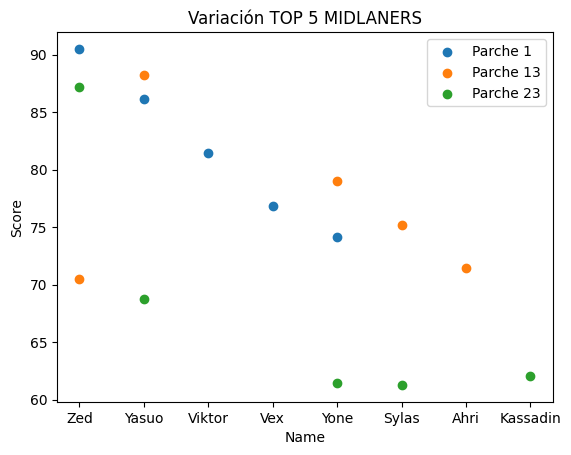

In [246]:
fig, ax = plt.subplots()

ax.scatter(p1_mid['Name'], p1_mid['Score'], label='Parche 1')
ax.scatter(p13_mid['Name'], p13_mid['Score'], label='Parche 13')
ax.scatter(p23_mid['Name'], p23_mid['Score'], label='Parche 23')

ax.set_xlabel("Name")
ax.set_ylabel("Score")
ax.set_title("Variación TOP 5 MIDLANERS")

ax.legend()

plt.show()






#### Como podemos observar se produce una gran variación, ya que hemos incluido todos los personajes que aparecían en los 3 Top5 y vemos como hay personajes que no aparecen en todos y que además varios de ellos muestran gran cambio en sus puntuaciones.

# Procedemos a mostrar como comentamos al principio, el por qué las filas cambian de un parche a otro.

In [295]:
# Sacamos las filas que se encuentran en la columna Name del p1

names1=p1.copy()

names1=names1[["Name"]]

names1

,Name
0,Aatrox
1,Ahri
2,Akali
3,Akali
4,Akshan
...,...
227,Ziggs
228,Zilean
229,Zilean
230,Zoe


In [272]:
# Para p13

names13=p13.copy()

names13=names13[["Name"]]

names13

,Name
0,Aatrox
1,Ahri
2,Akali
3,Akali
4,Akshan
...,...
235,Ziggs
236,Zilean
237,Zilean
238,Zoe


In [273]:
# Para p23

names23=p23.copy()

names23=names23[["Name"]]

names23.iloc[]

,Name
0,Aatrox
1,Ahri
2,Akali
3,Akali
4,Akshan
...,...
247,Zilean
248,Zilean
249,Zoe
250,Zoe


In [ ]:
Tengo 3 variables con una columna llamada "Name" de dataframe cada una:
Variable p1: tiene 232 rows x 1 columns
Variable p13: tiene 240 rows x 1 columns
Variable p23: tiene 252 rows x 1 columns

Necesito que me saques que cambios ha habido de la variable p1 a la variable p13 y después de la variable p13 a la variable p23

In [305]:

merge_1=names1.merge(names13, on="Name", how="left")
merge_1.drop_duplicates()


,Name
0,Aatrox
1,Ahri
2,Akali
4,Akshan
6,Alistar
...,...
224,Zed
226,Ziggs
228,Zilean
230,Zoe
